## 勾配降下法

In [391]:
import numpy as np
import torch
from torchviz import make_dot
import matplotlib.pyplot as plt
import japanize_matplotlib

In [392]:
data = np.array([
    [166.0, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1],
])

x = data[:, 0]
y = data[:, 1]

Text(0, 0.5, '$y$: 体重')

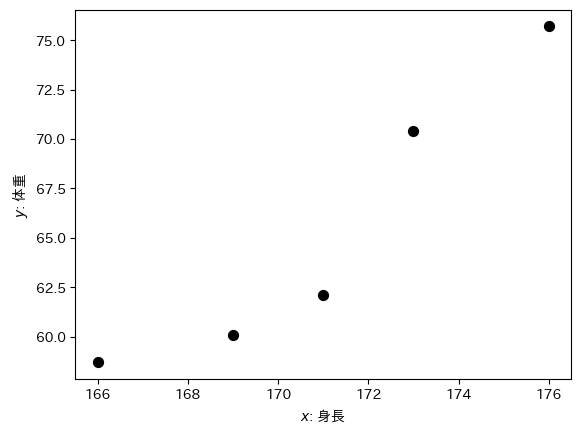

In [393]:
plt.scatter(x, y, c='k', s=50)
plt.xlabel('$x$: 身長')
plt.ylabel('$y$: 体重')

Text(0, 0.5, '$Y = y - y.mean$')

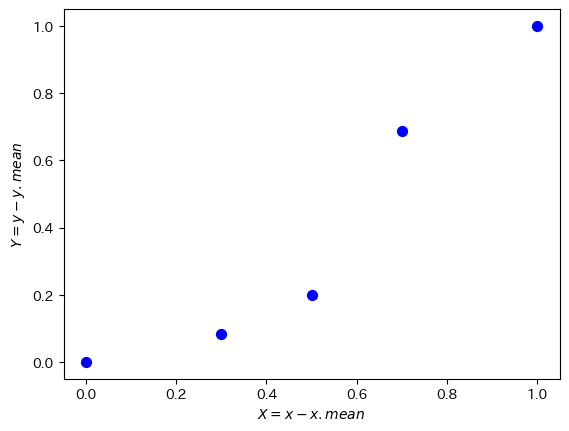

In [418]:
#X = x - x.mean()
#Y = y - y.mean()
X = (x - x.min()) / (x.max() - x.min())
Y = (y - y.min()) / (y.max() - y.min())

plt.scatter(X, Y, c='b', s=50)
plt.xlabel('$X = x - x.mean$')
plt.ylabel('$Y = y - y.mean$')


In [419]:
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

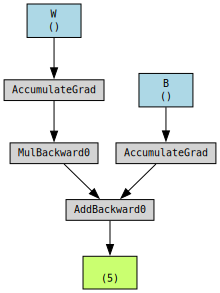

In [420]:
def pred(X, W, B):
    return W * X + B

Yp = pred(X, W, B)

params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)

display(g)

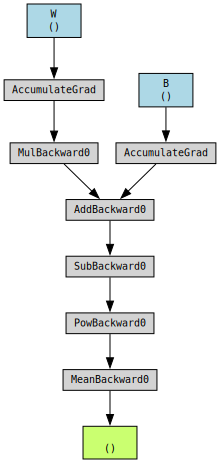

In [421]:
def mse(Yp, Y):
    loss = ((Yp - Y) ** 2).mean()
    return loss

loss = mse(Yp, Y)

g = make_dot(loss, params=params)

display(g)

In [422]:
loss.backward()

In [423]:
lr = 0.001

with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad
    W.grad.zero_()
    B.grad.zero_()


In [424]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500

lr = 0.001

history = np.zeros((0, 2))

In [425]:
for epoch in range(num_epochs):
    Yp = pred(X, W, B)
    loss = mse(Yp, Y)
    loss.backward()
    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad
        W.grad.zero_()
        B.grad.zero_()
    if epoch % 10 == 0:
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch: {epoch} / loss: {loss:.4f} / (W, B) = ({W.item():.2f}, {B.item()}:.2f)')

print(f'W = {W.data.numpy()}')
print(f'B = {B.data.numpy()}')

print(f'init: loss = {history[0, 1]:.4f}')
print(f'last: loss = {history[-1, 1]:.4f}')

epoch: 0 / loss: 1.2393 / (W, B) = (1.00, 0.9977882504463196:.2f)
epoch: 10 / loss: 1.1799 / (W, B) = (0.99, 0.9759714603424072:.2f)
epoch: 20 / loss: 1.1235 / (W, B) = (0.98, 0.9546921253204346:.2f)
epoch: 30 / loss: 1.0699 / (W, B) = (0.97, 0.9339367747306824:.2f)
epoch: 40 / loss: 1.0190 / (W, B) = (0.96, 0.9136922359466553:.2f)
epoch: 50 / loss: 0.9706 / (W, B) = (0.95, 0.8939454555511475:.2f)
epoch: 60 / loss: 0.9246 / (W, B) = (0.94, 0.8746840953826904:.2f)
epoch: 70 / loss: 0.8809 / (W, B) = (0.93, 0.8558959364891052:.2f)
epoch: 80 / loss: 0.8394 / (W, B) = (0.92, 0.8375689387321472:.2f)
epoch: 90 / loss: 0.7999 / (W, B) = (0.91, 0.8196915984153748:.2f)
epoch: 100 / loss: 0.7624 / (W, B) = (0.90, 0.8022526502609253:.2f)
epoch: 110 / loss: 0.7267 / (W, B) = (0.90, 0.7852407693862915:.2f)
epoch: 120 / loss: 0.6928 / (W, B) = (0.89, 0.7686454653739929:.2f)
epoch: 130 / loss: 0.6606 / (W, B) = (0.88, 0.7524561882019043:.2f)
epoch: 140 / loss: 0.6300 / (W, B) = (0.87, 0.7366627454757

(0.0, 500.0)

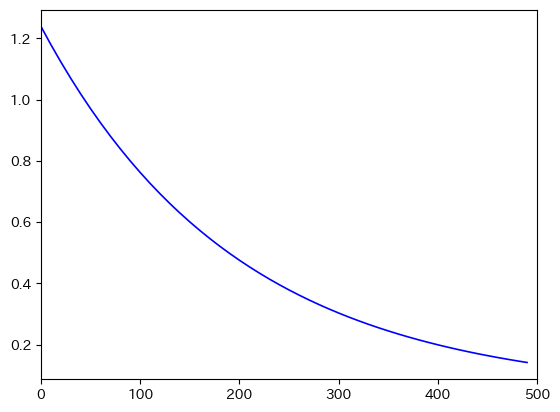

In [426]:
plt.plot(history[:, 0], history[:, 1], 'b')
plt.xlim(0, 500)


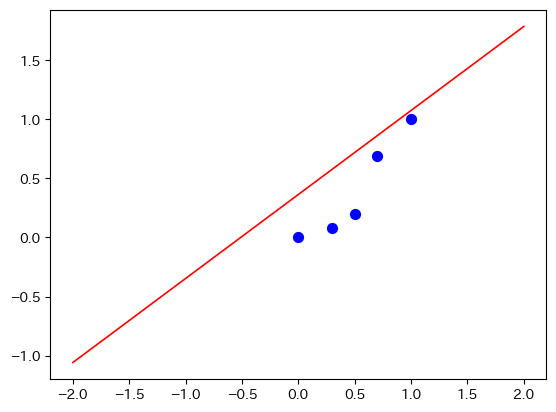

In [427]:
xx = np.arange(X.min() - 2, X.max() + 2)
yy = W.item() * xx + B.item()

plt.scatter(X, Y, c='b', s=50)
plt.plot(xx, yy, c='red')

In [428]:
W2 = torch.tensor(1.0, requires_grad=True).float()
B2 = torch.tensor(1.0, requires_grad=True).float()

In [429]:
import torch.optim as optim

optimizer = optim.SGD([W2, B2], lr=lr, momentum=0.9)
history2 = np.zeros((0, 2))

for epoch in range(num_epochs):
    Yp = pred(X, W2, B2)
    loss = mse(Yp, Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))
        print(f'epoch: {epoch} / loss: {loss:.4f} / (W2, B2) = ({W2.item():.2f}, {B2.item():.2f})')


epoch: 0 / loss: 1.2393 / (W2, B2) = (1.00, 1.00)
epoch: 10 / loss: 1.0059 / (W2, B2) = (0.95, 0.90)
epoch: 20 / loss: 0.6566 / (W2, B2) = (0.87, 0.74)
epoch: 30 / loss: 0.3884 / (W2, B2) = (0.80, 0.58)
epoch: 40 / loss: 0.2232 / (W2, B2) = (0.74, 0.45)
epoch: 50 / loss: 0.1324 / (W2, B2) = (0.70, 0.35)
epoch: 60 / loss: 0.0855 / (W2, B2) = (0.67, 0.28)
epoch: 70 / loss: 0.0622 / (W2, B2) = (0.65, 0.23)
epoch: 80 / loss: 0.0507 / (W2, B2) = (0.64, 0.19)
epoch: 90 / loss: 0.0449 / (W2, B2) = (0.64, 0.16)
epoch: 100 / loss: 0.0418 / (W2, B2) = (0.64, 0.14)
epoch: 110 / loss: 0.0399 / (W2, B2) = (0.64, 0.12)
epoch: 120 / loss: 0.0387 / (W2, B2) = (0.64, 0.11)
epoch: 130 / loss: 0.0377 / (W2, B2) = (0.65, 0.10)
epoch: 140 / loss: 0.0368 / (W2, B2) = (0.65, 0.10)
epoch: 150 / loss: 0.0360 / (W2, B2) = (0.66, 0.09)
epoch: 160 / loss: 0.0352 / (W2, B2) = (0.67, 0.08)
epoch: 170 / loss: 0.0345 / (W2, B2) = (0.67, 0.08)
epoch: 180 / loss: 0.0338 / (W2, B2) = (0.68, 0.07)
epoch: 190 / loss: 0.03

In [430]:
print(f'W2 = {W2.data.numpy()}')
print(f'B2 = {B2.data.numpy()}')

print(f'init: loss = {history2[0, 1]:.4f}')
print(f'last: loss = {history2[-1, 1]:.4f}')

W2 = 0.8548147678375244
B2 = -0.02247164398431778
init: loss = 1.2393
last: loss = 0.0215


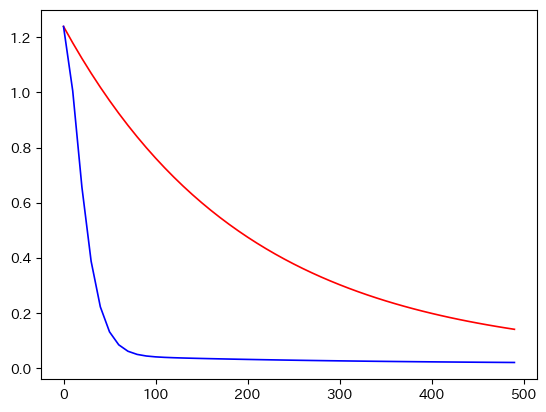

In [431]:
plt.plot(history[:, 0], history[:, 1], 'r')
plt.plot(history2[:, 0], history2[:, 1], 'b')

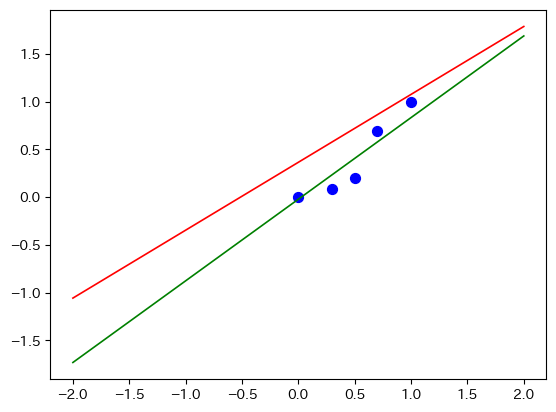

In [432]:
xx = np.arange(X.min() - 2, X.max() + 2)
y1 = W.item() * xx + B.item()
y2 = W2.item() * xx + B2.item()

plt.scatter(X, Y, c='blue', s=50)
plt.plot(xx, y1, c='red')
plt.plot(xx, y2, c='green')

In [433]:
print(f'(W, B) = ({W.item():.5f}, {B.item():.5f})')
print(f'(W2, B2) = ({W2.item():.5f}, {B2.item():.5f})')

(W, B) = (0.71102, 0.36414)
(W2, B2) = (0.85481, -0.02247)
